In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import os
# import the path
path = os.path.abspath(os.path.join("..", "01_get_the_data", "spy_historical_data.csv"))

In [6]:
# Load the CSV
df = pd.read_csv(path)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# Show the result
df.head()

,datetime,SPY
0,2021-08-31 16:30:00,451.56
1,2021-09-01 16:30:00,451.80
2,2021-09-02 16:30:00,453.19
3,2021-09-03 16:30:00,453.08
4,2021-09-07 16:30:00,451.46


In [7]:
# calculate cumulative log returns
df['Log_Returns'] = np.log(1 + df['SPY']/100)
df['Cumulative_Log_Returns'] = df['Log_Returns'].cumsum().apply(np.exp)-1

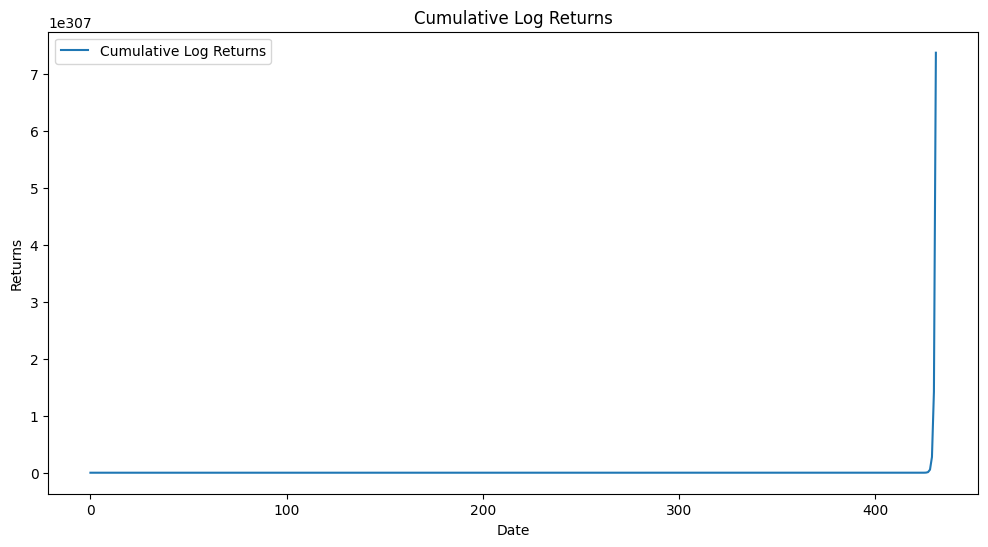

In [9]:
# plot Cumulative_Log_Returns
plt.figure(figsize=(12, 6))
plt.plot(df['Cumulative_Log_Returns'], label='Cumulative Log Returns')
plt.title('Cumulative Log Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [ ]:
# df_nq group by Year, Month and day columns
df_nq_grouped = df_nq_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_nq_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_nq_grouped['Cumulative_Profit'] = np.log(1 + df_nq_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

Questa riga di codice calcola il profitto cumulativo (Cumulative_Profit) utilizzando i logaritmi dei rendimenti percentuali, una tecnica comune in finanza per gestire la composizione dei rendimenti. 

Prima, `df_nq_grouped['Profit_pct_100'] / 100` converte i rendimenti percentuali in valori decimali (ad esempio, 5% diventa 0.05). Poi, `np.log(1 + ...)` calcola il logaritmo naturale del rendimento totale per ciascun periodo, trasformando i rendimenti semplici in log-rendimenti. Questo è utile perché i log-rendimenti possono essere sommati direttamente per ottenere il rendimento cumulativo su più periodi, a differenza dei rendimenti semplici che richiedono una moltiplicazione.

La funzione `.cumsum()` calcola la somma cumulativa dei log-rendimenti, cioè somma progressivamente ogni valore della serie. Successivamente, `.apply(np.exp)` applica l’esponenziale a ciascun valore cumulativo, invertendo il logaritmo e riportando i valori nello spazio dei rendimenti semplici. Infine, si sottrae 1 per ottenere il rendimento cumulativo netto.

In sintesi, questa riga crea una nuova colonna che mostra come si sarebbe evoluto il capitale nel tempo reinvestendo continuamente i profitti, tenendo conto della composizione dei rendimenti. 

Un aspetto importante è che l’uso dei log-rendimenti evita errori di arrotondamento e semplifica i calcoli rispetto ai rendimenti semplici.

In [4]:
# Example with pct_change(): cumulative sum vs cumulative product

import pandas as pd
import numpy as np

# Example price series
prices = pd.Series([100, 102, 101, 104, 104, 102, 105, 107, 106, 108])

# Calculate simple returns with pct_change()
simple_returns = prices.pct_change().fillna(0)

# Calculate log returns
log_returns = (1 + simple_returns).apply(np.log)

# Cumulative sum of simple returns (not correct for compounding)
cumsum_simple = simple_returns.cumsum()

# Cumulative product of simple returns (correct for compounding)
cumprod_simple = (1 + simple_returns).cumprod() - 1

# Cumulative sum of log returns (correct for compounding)
cumsum_log = log_returns.cumsum()
cumprod_log = np.exp(cumsum_log) - 1

print("Simple returns:\n", simple_returns.round(4).to_list())
print("Cumulative sum (simple):\n", cumsum_simple.round(4).to_list())
print("Cumulative product (simple):\n", cumprod_simple.round(4).to_list())
print("Log returns:\n", log_returns.round(4).to_list())
print("Cumulative sum (log):\n", cumsum_log.round(4).to_list())
print("Exp(cumsum(log)) - 1:\n", cumprod_log.round(4).to_list())

# Explanation:
# - simple_returns: percentage change between each price and the previous one.
# - cumsum_simple: adds up the simple returns, but this does not account for compounding.
# - cumprod_simple: multiplies the returns, correctly compounding them over time.
# - log_returns: log of (1 + simple return), which are additive over time.
# - cumsum_log: sum of log returns, which can be exponentiated to get the compounded return.
# - cumprod_log: equivalent to cumprod_simple, but using log returns.

Simple returns:
 [0.0, 0.02, -0.0098, 0.0297, 0.0, -0.0192, 0.0294, 0.019, -0.0093, 0.0189]
Cumulative sum (simple):
 [0.0, 0.02, 0.0102, 0.0399, 0.0399, 0.0207, 0.0501, 0.0691, 0.0598, 0.0786]
Cumulative product (simple):
 [0.0, 0.02, 0.01, 0.04, 0.04, 0.02, 0.05, 0.07, 0.06, 0.08]
Log returns:
 [0.0, 0.0198, -0.0099, 0.0293, 0.0, -0.0194, 0.029, 0.0189, -0.0094, 0.0187]
Cumulative sum (log):
 [0.0, 0.0198, 0.01, 0.0392, 0.0392, 0.0198, 0.0488, 0.0677, 0.0583, 0.077]
Exp(cumsum(log)) - 1:
 [0.0, 0.02, 0.01, 0.04, 0.04, 0.02, 0.05, 0.07, 0.06, 0.08]


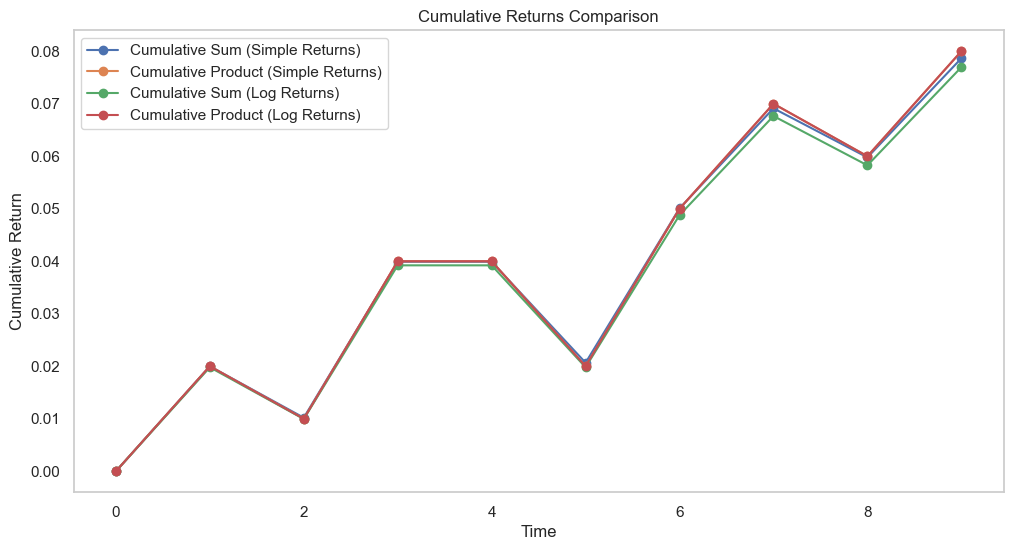

In [5]:
# plot cumsum_simple, cumprod_simple, cumsum_log and cumprod_log
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(cumsum_simple, label='Cumulative Sum (Simple Returns)', marker='o')
plt.plot(cumprod_simple, label='Cumulative Product (Simple Returns)', marker='o')
plt.plot(cumsum_log, label='Cumulative Sum (Log Returns)', marker='o')
plt.plot(cumprod_log, label='Cumulative Product (Log Returns)', marker='o')
plt.title('Cumulative Returns Comparison')
plt.xlabel('Time')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.show()